In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

# thoi gian hoc va ket qua thi do hay khong

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extened data 
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)


In [5]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
    w = [w_init]    
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    while count < max_count:
#         it += 1
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:                
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.09595332]
 [ 1.5607668 ]]


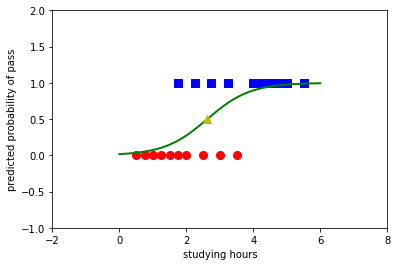

In [6]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
#plt.savefig('lg_results.png', bbox_inches='tight', dpi = 300)
plt.show()

Với dữ liệu 2 chiều 

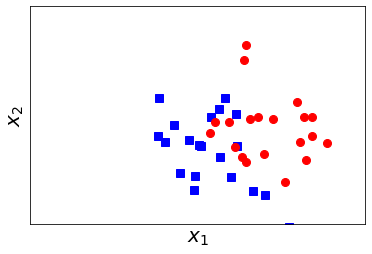

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2,2], [4, 2]]
cov = [[0.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize= 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize= 8, alpha= 1)
plt.axis('equal')
plt.xlim(0,4)
plt.ylim(0,5)

cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
#plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

In [13]:
#print(X0)
#print(X1)
X = np.concatenate((X0, X1), axis = 0).T
#print(X)
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T

X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)

eta = .05 
d = X.shape[0]
w_init = np.random.randn(d, 1)
#print(w_init)
w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)
print(w[-1])

[[-9.44046141]
 [ 2.24323998]
 [ 1.41397747]]


In [18]:
xm = np.arange(-1, 6, 0.025)
xlen = len(xm)
ym = np.arange(0, 4, 0.025)
ylen = len(ym)
xm, ym = np.meshgrid(xm, ym)

w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]
zm = sigmoid(w0 + w1*xm + w2*ym)

280 160
[array([[-1.   , -0.975, -0.95 , ...,  5.925,  5.95 ,  5.975],
       [-1.   , -0.975, -0.95 , ...,  5.925,  5.95 ,  5.975],
       [-1.   , -0.975, -0.95 , ...,  5.925,  5.95 ,  5.975],
       ...,
       [-1.   , -0.975, -0.95 , ...,  5.925,  5.95 ,  5.975],
       [-1.   , -0.975, -0.95 , ...,  5.925,  5.95 ,  5.975],
       [-1.   , -0.975, -0.95 , ...,  5.925,  5.95 ,  5.975]]), array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.025, 0.025, 0.025, ..., 0.025, 0.025, 0.025],
       [0.05 , 0.05 , 0.05 , ..., 0.05 , 0.05 , 0.05 ],
       ...,
       [3.925, 3.925, 3.925, ..., 3.925, 3.925, 3.925],
       [3.95 , 3.95 , 3.95 , ..., 3.95 , 3.95 , 3.95 ],
       [3.975, 3.975, 3.975, ..., 3.975, 3.975, 3.975]])]
[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.    1.025